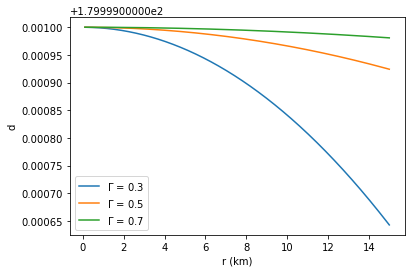

In [257]:
#Density Radius Profile

import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

G = 6.67*(10**-11)
k = 2
c = 3*(10**8)


pi = math.pi


def f(d,r):
   m = 4*pi*(r**3)/3 
   A = ((-G*d**(1 - GA))*(d*(c**2) + k*(d**GA))*(m*(c**2) + 4*pi*(r**3)*k*(d**GA)))/(((c**2)*r - 2*G*m)*(r*(c**2)*k*GA))   
   return A

d0 = 10*18
GA = 0.3
r = np.linspace(0.1,15,1000)

d = odeint(f,d0,r)


#plot

plot.plot(r,d,label = "$\Gamma$ = 0.3")
plot.xlabel("r")
plot.ylabel("d")

r = np.linspace(0.1,15,1000)
GA = 0.5
d = odeint( f , d0, r)

#plot
plot.plot(r,d ,label = "$\Gamma$ = 0.5")
plot.xlabel("r")
plot.ylabel("d")

r = np.linspace(0.1,15,1000)
GA = 0.7
d = odeint( f , d0, r)

#plot
plot.plot(r,d ,label = "$\Gamma$ = 0.7" )
plot.xlabel("r (km)")
plot.ylabel("d")

plot.legend()
plot.show()



Text(0, 0.5, 'm')

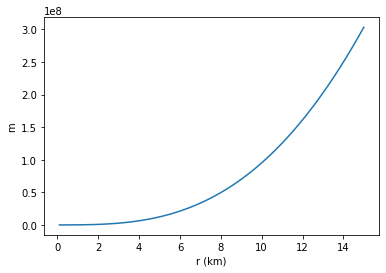

In [217]:
#Mass Radius Profile

import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

G = 6.67*(10**-11)
k = 2
c = 3*(10**8)
GA = 0.5

pi = math.pi

def g(m,r):
   d = (3*m)/(4*pi*(r**3))
   B = 4*pi*r**2*d  + ((4*pi*(r**3))/3)*(((-G*d**(1 - GA))*(d*(c**2) + k*(d**GA))*(m*(c**2) + 4*pi*(r**3)*k*(d**GA)))/(((c**2)*r - 2*G*m)*(r*(c**2)*k*GA)))
   return B

m0 = 10*10

r = np.linspace(0.1,15,1000)

m = odeint( g , m0, r)

#plot
plot.plot(r,m)
plot.xlabel("r (km)")
plot.ylabel("m")